# Линейная регрессия
В качестве примера будет использован датасет медицинских расходов, оплачиваемых медицинскими страхованием.

In [1]:
import pandas as pd

df = pd.read_csv('./insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##  Описание полей
- age - возраст
- sex - пол
- bmi - Иднекс массы тела
- children - кол-во детей
- smoker - курит или нет
- region - регион проживания
- charges - Стоимость


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.describe(include=['O'])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Построение матрици кореляции

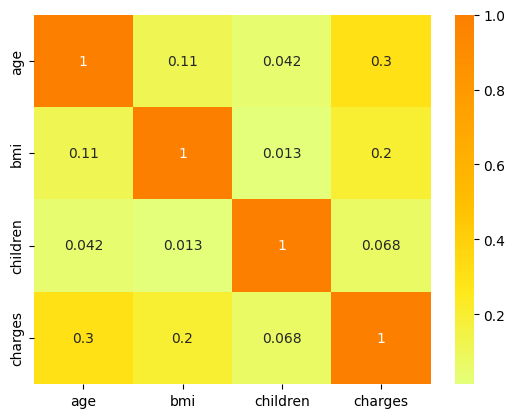

In [4]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

## Переведем категориальные признаки в числовые с использование One hot encoding

In [5]:
categorical_columns = ['sex', 'smoker', 'region']
df_enc = pd.get_dummies(data=df, prefix='ONE', prefix_sep='_',columns=categorical_columns,drop_first=True, dtype='int8')
df_enc

,age,bmi,children,charges,ONE_male,ONE_yes,ONE_northwest,ONE_southeast,ONE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


## Модель

In [6]:
from sklearn.model_selection import train_test_split
X = df_enc.drop('charges',axis=1)
y = df_enc['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7682943216543812

Как можно было бы улучшить score:
- Использовать нормализацию

(Скорее всего изменение было бы не значительно)